<a href="https://colab.research.google.com/github/dagyeom23658/project_dayeom_chatbot/blob/main/%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_%EC%84%9C%EB%B8%8C%EC%9B%8C%EB%93%9C_%ED%86%A0%ED%81%AC%EB%82%98%EC%9D%B4%EC%A0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 불러오기

- 해본 결과 전처리의 문제가 아니였다는 생각이 듭니다.

In [3]:
import os
import re
import shutil
import zipfile

import numpy as np
import pandas as pd
import tensorflow as tf
import unicodedata
import urllib3
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
train_data = pd.read_excel('/content/drive/MyDrive/프로젝트1/감성대화말뭉치(최종데이터)_Training.xlsx')  # 코랩에 올리고 실행되기까지 시간이 좀 걸림.
train_data.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [5]:
val_data = pd.read_excel('/content/drive/MyDrive/프로젝트1/감성대화말뭉치(최종데이터)_Validation.xlsx')  # 코랩에 올리고 실행되기까지 시간이 좀 걸림.
val_data.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN


In [6]:
stop_words1 = pd.read_excel('/content/drive/MyDrive/프로젝트1/ko_stop_words.xlsx',header=None) 

In [7]:
stop_words2 = pd.read_excel('/content/drive/MyDrive/프로젝트1/ko_stop_words2.xlsx', header=None)  # 코랩에 올리고 실행되기까지 시간이 좀 걸림.
stop_words2.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [8]:
print(stop_words1.shape)
print(stop_words1.isna().sum())

stop1 = stop_words1.iloc[:,0].to_frame().values.tolist()
stop2 = stop_words1.iloc[:,1].to_frame().values.tolist()
stop3 = stop_words1.iloc[:,2].to_frame().dropna().values.tolist()

# 2차원리스트 -> 1차원리스트로 변환 https://codechacha.com/ko/python-flatten-list/

stop = stop1+stop2+stop3
print(len(stop))

stop2=sum(stop,[])
print(len(stop2))

stop_im = stop_words2[0].to_list()
stop_word=stop2 + stop_im
print(len(stop_word))

stop_words=set(stop_word)
print(stop_words)

(250, 3)
0     0
1     0
2    73
dtype: int64
677
677
777
{'그렇지 않다면', '탕탕', '지', '못하', '한데', '다음으로', '어기여차', '끙끙', '으로 인하여', '비슷하다', '할수있어', '점에서 보아', '잇따라', '하는것이 낫다', '입장에서', '이젠', '않기 위하여', '까지 미치다', '대하면', '할줄알다', '시작하여', '한다면', '진짜로', '얼마큼', '습니까', '아울러', '위해서', '바로', '다시', '또한', '타다', '번', '둥둥', '우리', '제', '응', '하도록하다', '더구나', '각', '명', '기점으로', '딩동', '하곤하였다', '것', '원', '이로 인하여', '할지언정', '만큼', '사람', '보다더', '게우다', '다음에', '반대로', '양자', '고로', '근거로', '얼마나', '반드시', '예하면', '위하', '보는데서', '따지지 않다', '당신', '더', '할 생각이다', '당장', '단지', '어찌하여', '엉엉', '불문하고', '그에 따르는', '매번', '향하다', '더욱이는', '인젠', '즈음하여', '들', '어느쪽', '만들', '싶', '같다', '정도', '하지만', '거니와', '개', '생각하', '어떻', '동안', '다소', '또', '아이', '만 못하다', '언젠가', '메쓰겁다', '고려하면', '령', '어쨋든', '끼익', '그럼에도 불구하고', '향하여', '각자', '너', '과연', '이르기까지', '와', '동시에', '연이서', '이렇구나', '자기', '저것만큼', '일때', '기대여', '뒤따라', '비교적', '오호', '하도록시키다', '와르르', '이럴정도로', '의거하여', '대해 말하자면', '쪽으로', '그래도', '임에 틀림없다', '보드득', '전부', '조금', '이와 같은', '무렵', '지말고', '과', '않', '논하지 않다', '그러나', '다

In [9]:
stop_words.add(',')
stop_words.add('.')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [11]:
train_data['번호']=train_data['번호'].astype('str')

# 앞뒤 공백 처리.
train_data =train_data.apply(lambda x: x.str.strip() , axis = 1)  #https://www.delftstack.com/ko/howto/python-pandas/difference-between-pandas-apply-map-and-applymap/
train_data.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [12]:
# 공백제거
val_data['번호']=val_data['번호'].astype('str')
val_data =val_data.apply(lambda x: x.str.strip() , axis = 1)

In [13]:
# 확인
val_data.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN


In [14]:
print('챗봇 샘플의 개수 :', len(train_data))

챗봇 샘플의 개수 : 40879


In [15]:
print(train_data.isnull().sum())

번호            0
연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템응답1        0
사람문장2         0
시스템응답2        0
사람문장3      9820
시스템응답3     9820
사람문장4     39407
시스템응답4    39517
dtype: int64


In [37]:
print('총 감정_대분류의 개수 : {}'.format(len(train_data['감정_대분류'].unique())))
print(train_data['감정_대분류'].unique())

총 감정_대분류의 개수 : 6
['기쁨' '불안' '당황' '슬픔' '분노' '상처']


In [38]:
print('총 감정_소분류의 개수 : {}'.format(len(train_data['감정_소분류'].unique())))
print(train_data['감정_소분류'].unique())

총 감정_소분류의 개수 : 58
['신이 난' '스트레스 받는' '당황' '안도' '취약한' '우울한' '구역질 나는' '좌절한' '눈물이 나는' '배신당한'
 '남의 시선을 의식하는' '죄책감의' '당혹스러운' '분노' '두려운' '낙담한' '회의적인' '마비된' '혼란스러운' '흥분'
 '한심한' '염세적인' '안달하는' '걱정스러운' '조심스러운' '충격 받은' '상처' '불안' '노여워하는' '기쁨' '짜증내는'
 '환멸을 느끼는' '비통한' '혐오스러운' '억울한' '만족스러운' '부끄러운' '버려진' '고립된' '괴로워하는' '자신하는'
 '외로운' '방어적인' '편안한' '질투하는' '감사하는' '초조한' '실망한' '슬픔' '신뢰하는' '가난한, 불우한'
 '후회되는' '툴툴대는' '성가신' '열등감' '희생된' '느긋' '악의적인']


# 감성 레이블 만들기(숫자로 매핑)

In [39]:
#감정 대분류와 소분류를 키값쌍으로 정렬.
dic = {}
for uni_class in train_data['감정_대분류'].unique():
    uni = train_data[train_data['감정_대분류'] == uni_class]['감정_소분류'].unique()
    dic[uni_class] = list(uni)
print(dic['기쁨'])

['신이 난', '안도', '흥분', '기쁨', '만족스러운', '자신하는', '편안한', '감사하는', '신뢰하는', '느긋']


In [40]:
# 감정소분류주제 58개를 숫자레이블 딕셔너리로 변경
feel_class = train_data['감정_소분류'].unique()

i = 0
feel_dic = {}
for feel in feel_class:
    feel_dic[feel] = i
    i+=1
# feel_dic  #key:value = 감정소분류:숫자

In [41]:
# 숫자로 감정을 찾을 수 있도록 reverse
feel_dic_reverse = {}
for key, value in feel_dic.items():
    feel_dic_reverse[value] = key
feel_dic_reverse

{0: '신이 난',
 1: '스트레스 받는',
 2: '당황',
 3: '안도',
 4: '취약한',
 5: '우울한',
 6: '구역질 나는',
 7: '좌절한',
 8: '눈물이 나는',
 9: '배신당한',
 10: '남의 시선을 의식하는',
 11: '죄책감의',
 12: '당혹스러운',
 13: '분노',
 14: '두려운',
 15: '낙담한',
 16: '회의적인',
 17: '마비된',
 18: '혼란스러운',
 19: '흥분',
 20: '한심한',
 21: '염세적인',
 22: '안달하는',
 23: '걱정스러운',
 24: '조심스러운',
 25: '충격 받은',
 26: '상처',
 27: '불안',
 28: '노여워하는',
 29: '기쁨',
 30: '짜증내는',
 31: '환멸을 느끼는',
 32: '비통한',
 33: '혐오스러운',
 34: '억울한',
 35: '만족스러운',
 36: '부끄러운',
 37: '버려진',
 38: '고립된',
 39: '괴로워하는',
 40: '자신하는',
 41: '외로운',
 42: '방어적인',
 43: '편안한',
 44: '질투하는',
 45: '감사하는',
 46: '초조한',
 47: '실망한',
 48: '슬픔',
 49: '신뢰하는',
 50: '가난한, 불우한',
 51: '후회되는',
 52: '툴툴대는',
 53: '성가신',
 54: '열등감',
 55: '희생된',
 56: '느긋',
 57: '악의적인'}

In [42]:
feel_bic_class = train_data['감정_대분류'].unique()

i = 0
feel_bic_dic= {}
for feel in feel_bic_class:
    feel_bic_dic[feel] = i
    i+=1

In [43]:
# 숫자로 감정을 찾을 수 있도록 reverse
feel_bic_dic_reverse = {}
for key, value in feel_bic_dic.items():
    feel_bic_dic_reverse[value] = key
feel_bic_dic_reverse

{0: '기쁨', 1: '불안', 2: '당황', 3: '슬픔', 4: '분노', 5: '상처'}

In [44]:
# train셋과 val셋 비교
print('총 감정_대분류의 개수 : {}'.format(len(val_data['감정_대분류'].unique())))
set(val_data['감정_대분류'].unique()) == set(train_data['감정_대분류'].unique())

총 감정_대분류의 개수 : 6


True

In [45]:
set(val_data['감정_소분류'].unique()) == set(train_data['감정_소분류'].unique())

True

In [46]:
val_label = []
for feel in val_data['감정_대분류']:
    val_label.append(feel_bic_dic[feel])
pd.Series(val_label)

0       4
1       3
2       1
3       2
4       4
       ..
5125    0
5126    1
5127    4
5128    4
5129    4
Length: 5130, dtype: int64

In [47]:
train_label = []
for feel in train_data['감정_대분류']:
    train_label.append(feel_bic_dic[feel])
np.array(train_label)

array([0, 1, 2, ..., 3, 0, 1])

In [49]:
# 훈련 데이터와 테스트 데이터의 문장과 레이블을 각각 저장합니다.
y_train = np.array(train_label)
y_test = np.array(val_label)

In [50]:
# 훈련용, 테스트용 뉴스 기사 데이터의 레이블에 원-핫 인코딩을 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [62]:
print('레이블 데이터의 크기(shape):', y_train.shape)

레이블 데이터의 크기(shape): (40879, 6)


In [61]:
print(y_train[0])

[1. 0. 0. 0. 0. 0.]


# 전처리 : 서브워드 토크나이저

In [16]:
# 구두점 처리
questions = []
for sentence in train_data['사람문장1']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [71]:
# 구두점 처리
questions_test = []
for sentence in val_data['사람문장1']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions_test.append(sentence)

In [17]:
answers = []
for sentence in train_data['시스템응답1']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [18]:
print(questions[:5])
print(answers[:5])

['아내가 드디어 출산하게 되어서 정말 신이 나 .', '당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야 .', '고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워 .', '재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야 .  너무 행복해 .', '빚을 드디어 다 갚게 되어서 이제야 안도감이 들어 .']
['아내분이 출산을 하시는군요 .  정말 축하드려요 .', '약 종류가 많아 번거로우시겠어요 .', '고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요 .', '재취업 후 첫 월급이라 정말 기쁘시겠어요 .', '기분 좋으시겠어요 .  앞으로는 어떻게 하실 생각이신가요 ?']


# 단어 집합 생성
- 서브워드 단위로 토큰을 분리하는 토크나이저로 학습 데이터로부터 학습하여 서브워드로 구성된 단어 집합을 생성

In [19]:
pip install tensorflow_datasets

In [20]:
import tensorflow_datasets as tfds
import urllib.request

In [21]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
import tensorflow_datasets as tfds
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)  #tfds.features.text.SubwordTextEncoder.build_from_corpus

In [22]:
tokenizer.vocab_size 

8099

In [23]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

# 패딩에 사용될 0번 토큰부터 마지막 토큰인 8,179번 토큰까지의 개수를 카운트하면 단어 집합의 크기는 8,180개

In [24]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8099]
종료 토큰 번호 : [8100]
단어 집합의 크기 : 8101


In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions_test + answers, target_vocab_size=2**13)  #tfds.features.text.SubwordTextEncoder.build_from_corpus

# 정수 인코딩과 패딩

In [25]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

임의의 질문 샘플을 정수 인코딩 : [4850, 2051, 2113, 1497, 17, 4, 198, 3326, 1233, 2, 37, 96, 4609, 6754, 3152, 2918, 6, 35, 1]


In [26]:
print('정수 인코딩 결과를 디코딩 : {}'.format(tokenizer.decode([4850, 2051, 2113, 1497, 17, 4, 198, 3326, 1233, 2, 37, 96, 4609, 6754, 3152, 2918, 6, 35, 1])))

정수 인코딩 결과를 디코딩 : 지난주에 주식이 폭락해서 너무 큰 손해를 봤어 .  어떻게 해야 좋을지 모르겠고 정신이 나갈 것 같아 .


In [27]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [4850, 2051, 2113, 1497, 17, 4, 198, 3326, 1233, 2, 37, 96, 4609, 6754, 3152, 2918, 6, 35, 1]
기존 문장: 지난주에 주식이 폭락해서 너무 큰 손해를 봤어 .  어떻게 해야 좋을지 모르겠고 정신이 나갈 것 같아 .


In [28]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

4850 ----> 지난주에 
2051 ----> 주식이 
2113 ----> 폭
1497 ----> 락
17 ----> 해서 
4 ----> 너무 
198 ----> 큰 
3326 ----> 손해를 
1233 ----> 봤어
2 ---->  .  
37 ----> 어떻게 
96 ----> 해야 
4609 ----> 좋을지 
6754 ----> 모르겠고 
3152 ----> 정신이 
2918 ----> 나갈 
6 ----> 것 
35 ----> 같아
1 ---->  .


In [29]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [30]:
questions, answers = tokenize_and_filter(questions, answers)

In [31]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (40879, 40)
답변 데이터의 크기(shape) : (40879, 40)


In [32]:
# 0번 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[8099   70  373 4035   14  256   19  894   34    1 8100    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8099 1246 1983  500    2   19  519    1 8100    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


# LSTM으로 감성분류

In [33]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
# 임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 은닉 상태의 크기가 128인 LSTM을 사용
embedding_dim = 100
hidden_units = 128
num_classes =  6  # 58

model = Sequential()
model.add(Embedding(VOCAB_SIZE, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

In [65]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)합니다. 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [60]:
questions[0]

array([8099,   70,  373, 4035,   14,  256,   19,  894,   34,    1, 8100,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [66]:
# 에포크는 총 15번을 수행하겠습니다. 또한 훈련 데이터 중 20%를 검증 데이터로 사용하면서 정확도를 확인합니다.
history = model.fit(questions, y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50
511/511 [==============================] - ETA: 0s - loss: 1.6438 - acc: 0.2810
Epoch 00001: val_acc improved from -inf to 0.43077, saving model to best_model.h5
511/511 [==============================] - 58s 110ms/step - loss: 1.6438 - acc: 0.2810 - val_loss: 1.3899 - val_acc: 0.4308
Epoch 2/50
511/511 [==============================] - ETA: 0s - loss: 1.2115 - acc: 0.5317
Epoch 00002: val_acc improved from 0.43077 to 0.55785, saving model to best_model.h5
511/511 [==============================] - 54s 105ms/step - loss: 1.2115 - acc: 0.5317 - val_loss: 1.1942 - val_acc: 0.5579
Epoch 3/50
511/511 [==============================] - ETA: 0s - loss: 1.0076 - acc: 0.6400
Epoch 00003: val_acc improved from 0.55785 to 0.59014, saving model to best_model.h5
511/511 [==============================] - 53s 104ms/step - loss: 1.0076 - acc: 0.6400 - val_loss: 1.1303 - val_acc: 0.5901
Epoch 4/50
511/511 [==============================] - ETA: 0s - loss: 0.8995 - acc: 0.6892
Epoch 00004:

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

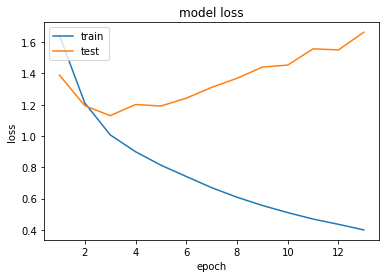

In [72]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# 예측해보기
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stop_words] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model.predict(pad_new) # 예측
#   print(score[0, score.argmax()])
  return feel_bic_dic_reverse[score.argmax()]

In [ ]:
sentiment_predict('사랑해')

In [ ]:
### 토크나이저는 큰 상관이 없는 것 같고... 모델의 문제인가?